# U.S. Medical Insurance Costs

This project relates to `Insurance` dataset, which can be found in the file `insurance.csv`. It contains 7 variables of more than 1000 US insurance clients. The variables are:
- `age`: age (years)
- `sex`: gender of client (male/female)
- `bmi`: body mass index, calculated as weight (in kilogram) divided by height (in meter) squared 
- `children`: number of children
- `smoker`: whether the client smoke (yes/no)
- `region`: area of residence (northeast, northwest, southeast, southwest)
- `charge`: amount of insurance charge

We are interested in exploring data on `how certain factors affect the insurance charge of the clients` in the US.

In [30]:
# import useful packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data & inital inspection

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# inspect number of rows, columns, and data types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# inspect of missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# perform summary statistics
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
# mode value of charges
insurance.charges.mode()

0    1639.5631
Name: charges, dtype: float64

**Note**:
- total number of samples are 1338
- age, bmi, and children variables mean and median (50%) have similar values, indicating we have normally distributed data
- charges column ranges from 1121 to 63770 with mean 13270, median 9382, and mode 1639, which signifies a positive skewness

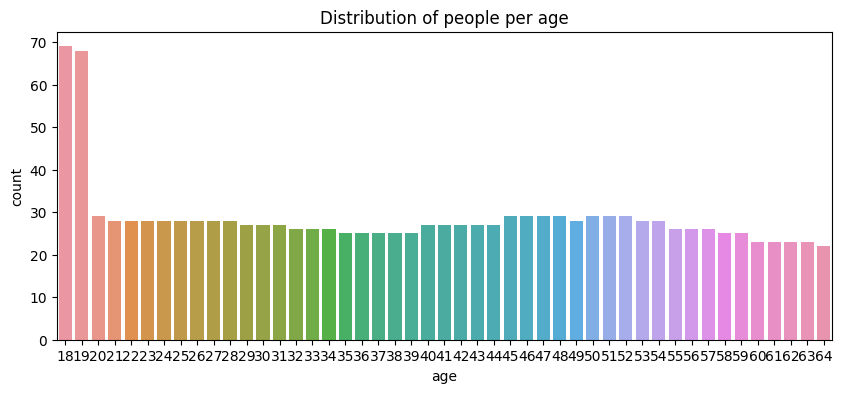

<Figure size 640x480 with 0 Axes>

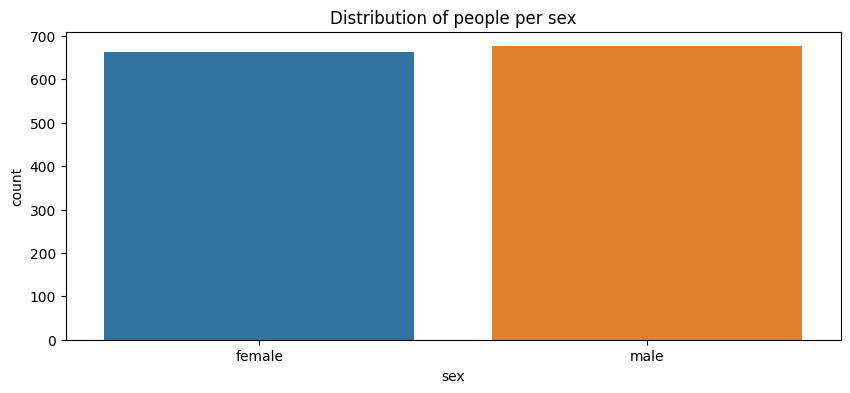

<Figure size 640x480 with 0 Axes>

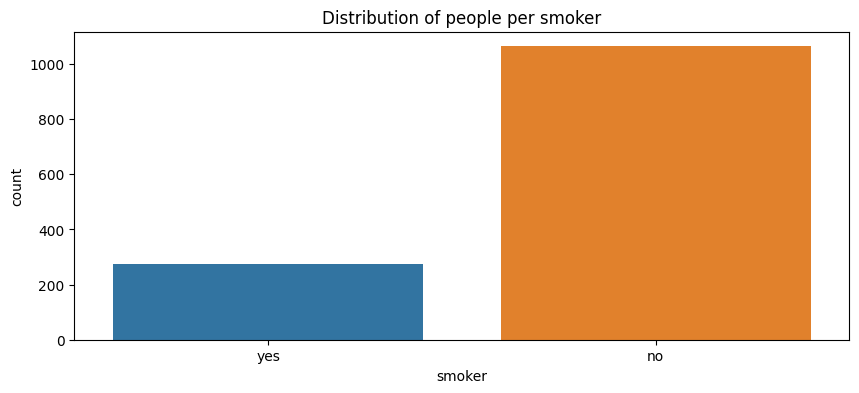

<Figure size 640x480 with 0 Axes>

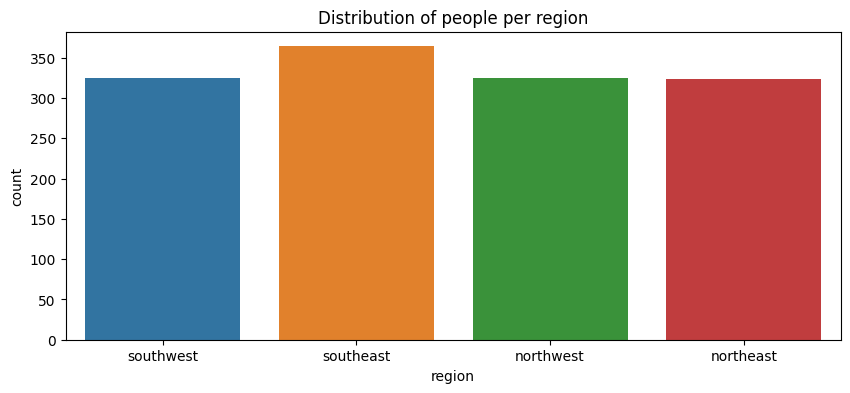

<Figure size 640x480 with 0 Axes>

In [47]:
# counting variables sex, region, smoker distribution
for column in ['age','sex',  'smoker', 'region']:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=insurance)
    plt.title('Distribution of people per {}'.format(column))
    plt.show()
    plt.clf()

**Note**:
- we have relatively balanced data for each of sex and region (although slightly higher on southeast region)
- only about a quarter of the clients smoke
- almost half have 0 children; and 
- clients in 18-19 years old are the highest age group, lowering mean age value to 39

c:\Users\fanzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


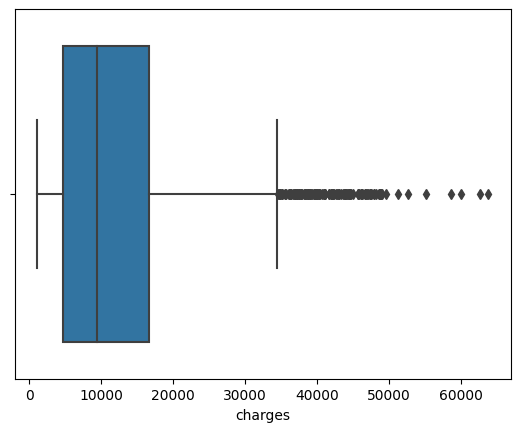

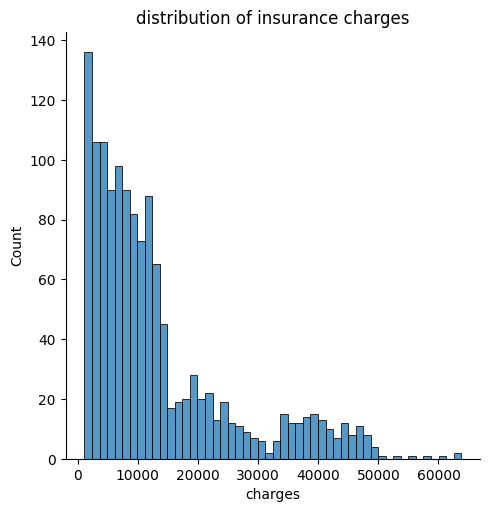

<Figure size 640x480 with 0 Axes>

In [32]:
#  insurance price charge histogram

sns.boxplot(x = insurance.charges)
sns.displot(insurance.charges, bins=50)
plt.title('distribution of insurance charges')
plt.show()
plt.clf()

**Note**: the plot highlights most insurance charges fall within range 5000-17000; however, there are many outliers resulting in long right-handed tail histogram

## Analyzing data

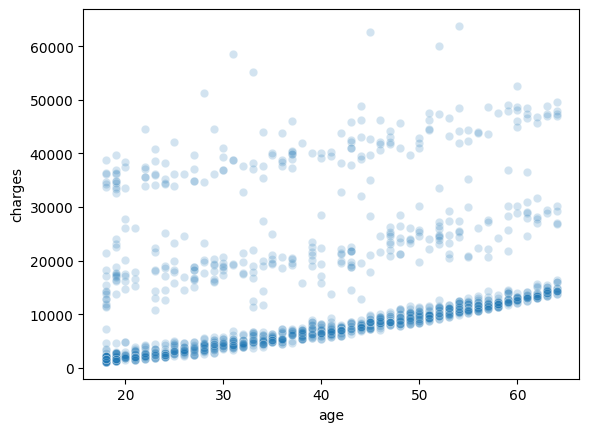

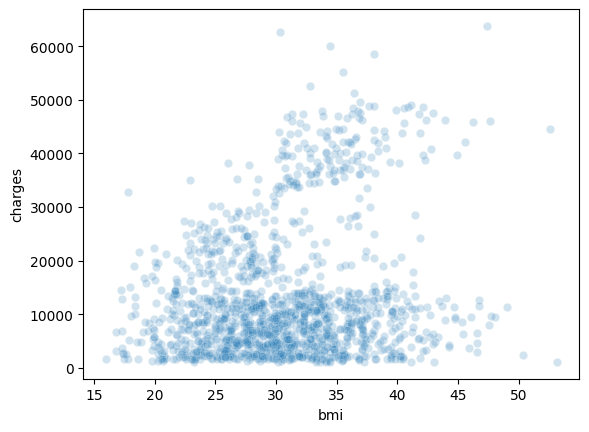

<Figure size 640x480 with 0 Axes>

In [62]:
# relationship of age, bmi vs charges
for var in ['age','bmi']:
    sns.scatterplot(x = var, y = 'charges',  data = insurance, alpha=0.2)
    plt.show()
    plt.clf()

it seems that most of the charges are less than 15000 (around mean value). To see more clearly, we filter the data

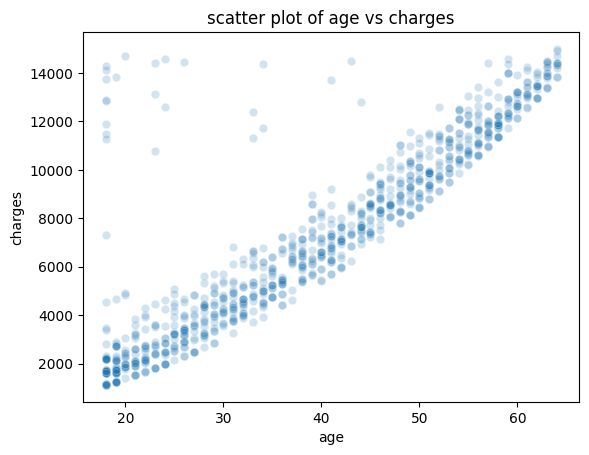

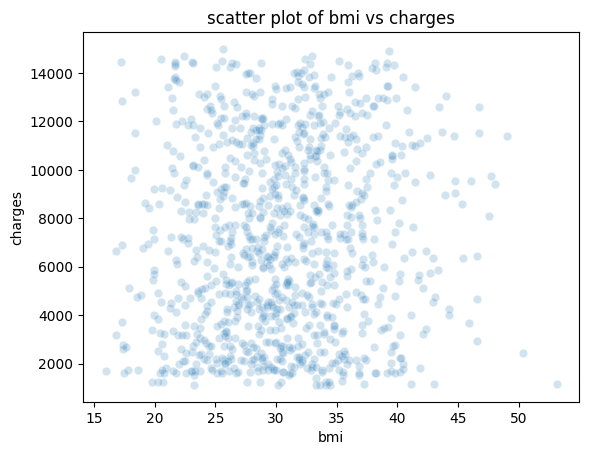

<Figure size 640x480 with 0 Axes>

In [64]:
filter = insurance.charges[insurance.charges <= 15000]

for var in ['age','bmi']:
    sns.scatterplot(x = var, y = filter, data = insurance, alpha=0.2)
    plt.title('scatter plot of {} vs charges'.format(var))
    plt.show()
    plt.clf()

**Note**: 
- there is a positive relationship between ages and insurance charge, older clients pay more as they age 
- the 2nd graph is still not given a clear relationship between bmi and insurance charge

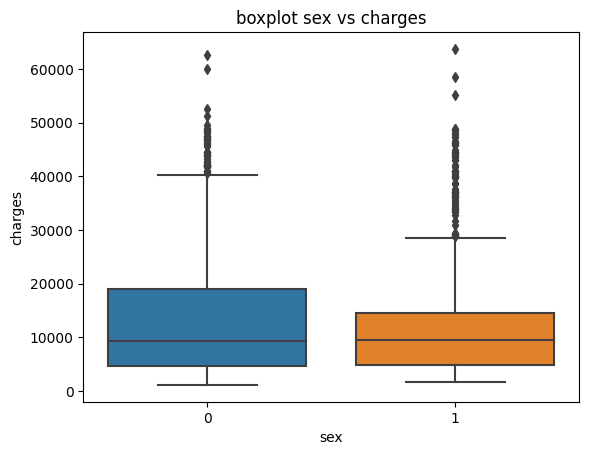

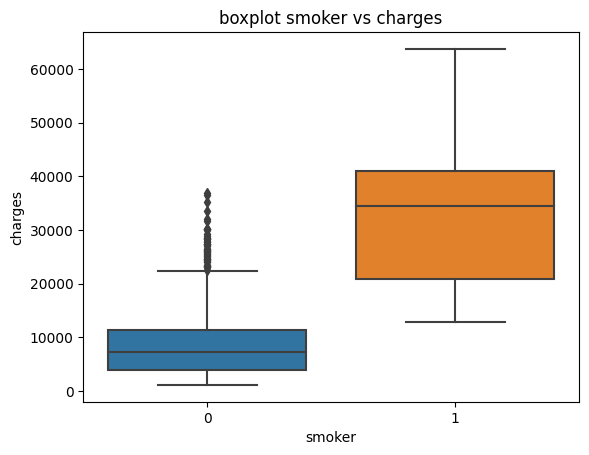

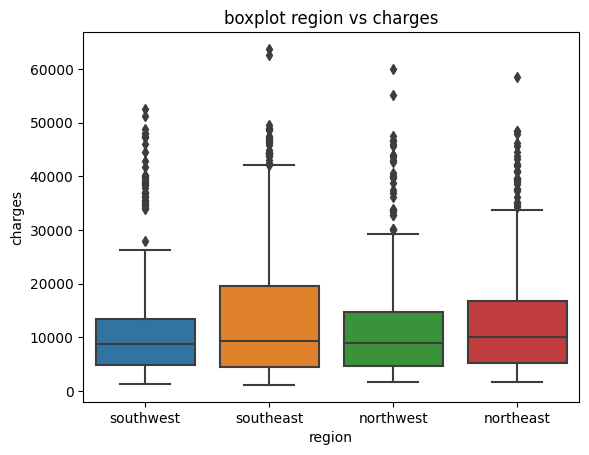

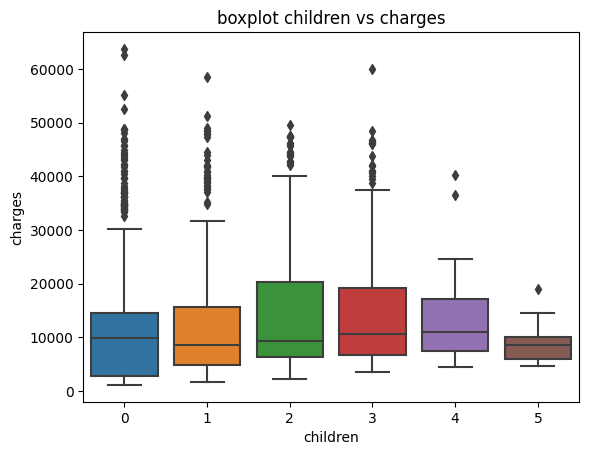

<Figure size 640x480 with 0 Axes>

In [65]:
# boxplot categorical sex, smoker, region vs charge

for var in ['sex','smoker', 'region','children']:
    sns.boxplot(x=var, y='charges', data=insurance)
    plt.title('boxplot {} vs charges'.format(var))
    plt.show()
    plt.clf()


**Note**:
- No indication of strong relationship between region and sex against price charges
- Strong relationsip of insurance charge between smoker and non-smoker. Non-smoker cost range are typically less than 10000, while smoker pays twice than average clients, ranging from 20000 to 40000 per client
- there is slight increase of median at children vs charges plot, indicating weak relationship and the amount is likely influenced by other factors  
- Noticed that each of the variables has outliers

In [ ]:
# compare insurance cost of smoker vs non-smoker
charges_smoker = insurance.groupby('smoker')['charges'].mean()

print(round(charges_smoker))


smoker
no      8434.0
yes    32050.0
Name: charges, dtype: float64


In [57]:
# change sex variable to 0 (male) and 1 (female)
insurance['sex'] = insurance['sex'].map({'male': 0, 'female': 1})

# change smoker to 0 (no) and 1 (yes)
insurance['smoker'] = insurance['smoker'].map({'no': 0, 'yes': 1})

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


<Axes: >

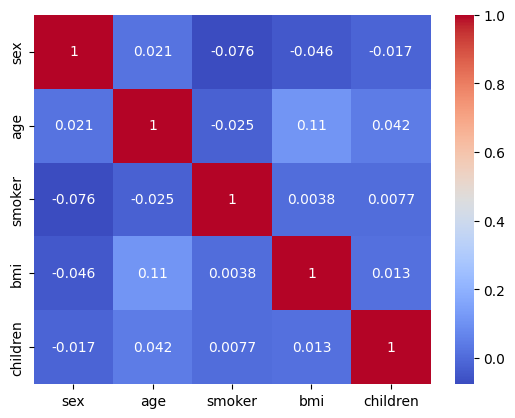

In [61]:
# perform correlation matrix
corr = insurance[['sex','age', 'smoker', 'bmi', 'children']]
corr_matrix = corr.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**End Note**: 
We performed exploratory data analysis on the insurance dataset to get a better picture of its variables and characteristics. We notice that the dataset may not be representative of the population. Examples of some potential bias are higher propotion of younger age group and the lack of income data which may affect the generalizability of the findings. It is important to consider these potential sources of bias when using the dataset for research and other applications. 